---
title: "Data Representation in Scikit-Learn"
format:
  html:
    toc: true
    theme: cosmo
    page-layout: full
    fontsize: 1.3em
    grid:
      sidebar-width: 300px
      body-width: 900px
      margin-width: 300px
      gutter-width: 1.5rem
execute:
  echo: true
---

Machine learning is about creating models from data; for that reason, we'll start by discussing how data can be represented. The best way to think about data within Scikit-Learn is in terms of tables. A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. For example, consider the Iris dataset, famously analyzed by Ronald Fisher in 1936. We can download this dataset in the form of a Pandas DataFrame using the Seaborn library. 

In [113]:
import pandas as pd
import seaborn as sns
import plotly.express as px
%config InlineBackend.figure_format = 'retina'

In [134]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as samples, and the number of rows as n_samples.  
Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as n_features.

### The Features Matrix
The table layout makes clear that the information can be thought of as a two- dimensional numerical array or matrix, which we will call the features matrix. By convention, this matrix is often stored in a variable named X. The features matrix is assumed to be two-dimensional, with shape [n_samples, n_features], and is most often contained in a NumPy array or a Pandas DataFrame, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, a sample might represent a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are often real-valued, but may be Boolean or discrete-valued in some cases.

### The Target Array
In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. The target array is usually one- dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series. The target array may have continuous numerical values, or discrete classes/labels. While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, [n_samples, n_targets] target array, we will pri‐ marily be working with the common case of a one-dimensional target array.

A common point of confusion is how the target array differs from the other feature columns. The distinguishing characteristic of the target array is that it is usually the quantity we want to predict from the features: in statistical terms, it is the dependent variable. For example, given the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the species column would be considered the target array.

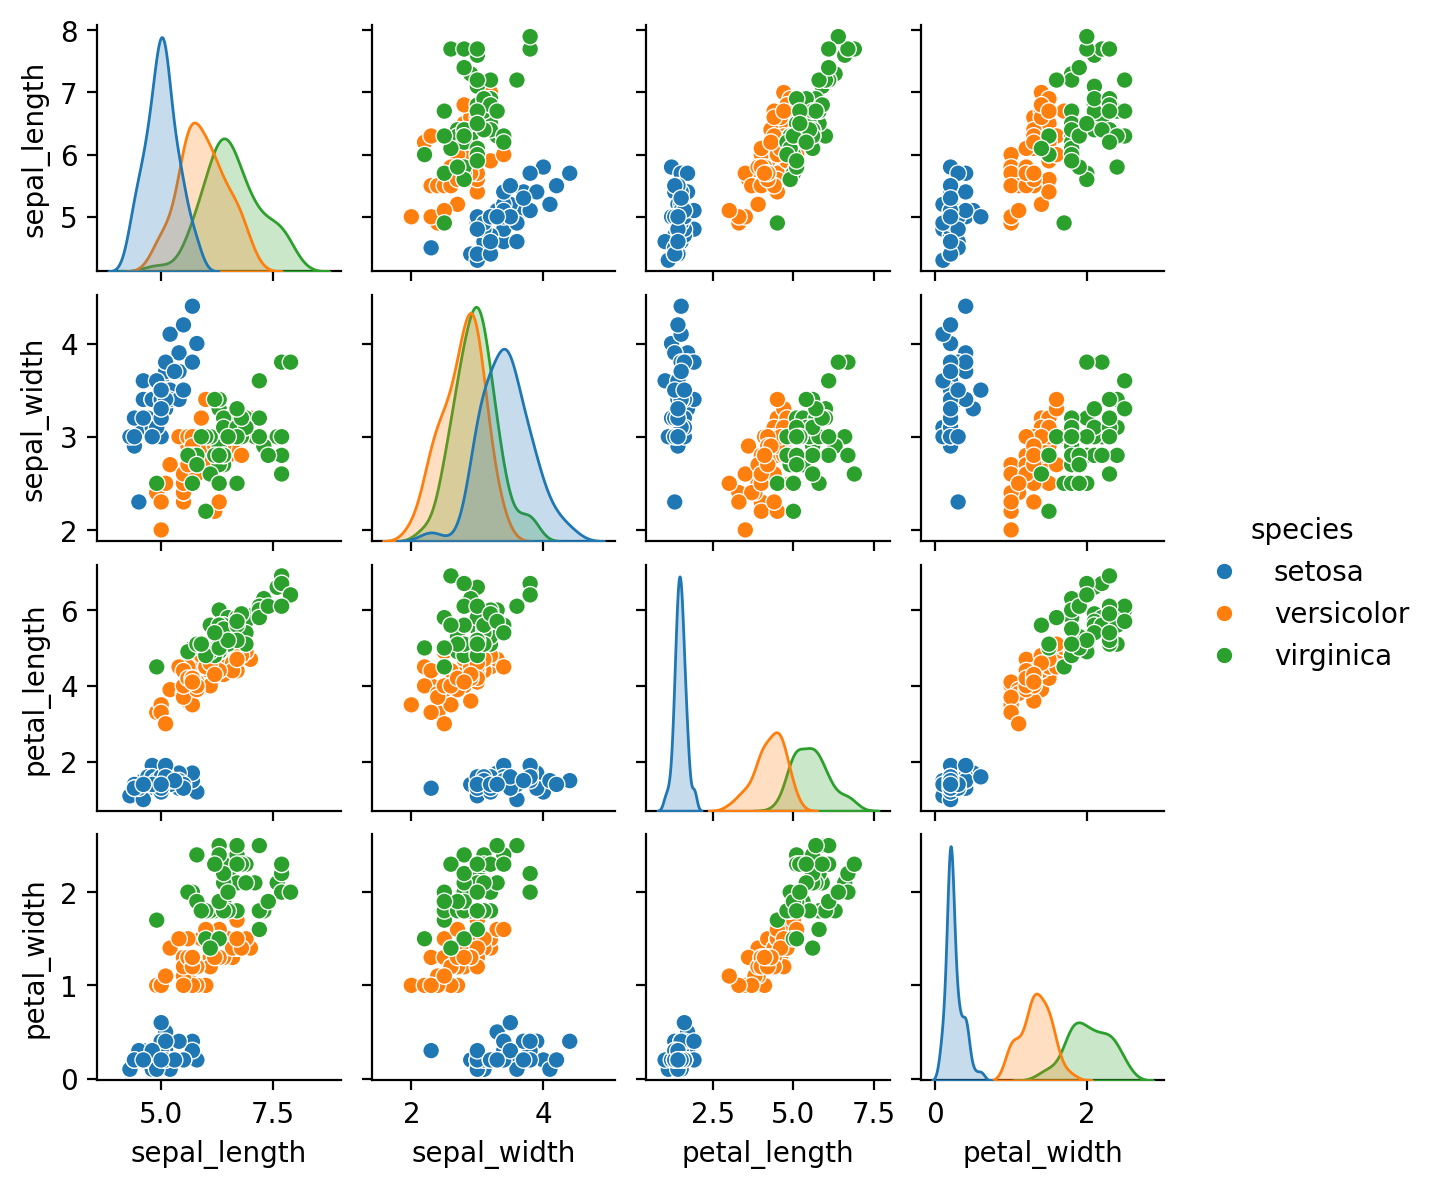

In [ ]:
#| fig-align: center
sns.pairplot(iris, hue='species', height=1.5);


For use in Scikit-Learn, we will extract the features matrix and target array from the DataFrame, which we can do using some of the Pandas DataFrame operations.

In [ ]:
X_iris = iris.drop(columns="species")
y_iris = iris['species']

### Supervised Learning Example: Iris Classification
For this task, we will use a simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian dis‐ tribution. Because it is so fast and has no hyperpara‐ meters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [117]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [118]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(Xtrain, ytrain) 
y_model = model.predict(Xtest) 

Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true values:

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algo‐ rithm is effective for this particular dataset.

### Unsupervised Learning Example: Iris Dimensionality
As an example of an unsupervised learning problem, let’s take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four-dimensional: there are four features recorded for each sample.

The task of dimensionality reduction centers around determining whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or more!

Here we will use principal component analysis, which is a fast linear dimensionality reduction technique. We will ask the model to return two com‐ ponents—that is, a two-dimensional representation of the data.

In [120]:
from sklearn.decomposition import PCA
model = PCA(n_components=2) 
model.fit(X_iris) 
X_2D = model.transform(X_iris) 

Now let’s plot the results. A quick way to do this is to insert the results into the origi‐ nal Iris DataFrame, and use Seaborn’s lmplot to show the results.

In [137]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
px.scatter(iris, "PCA1", "PCA2", color="species")

We see that in the two-dimensional representation, the species are fairly well separa‐ ted, even though the PCA algorithm had no knowledge of the species labels! This suggests to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised Learning Example: Iris Clustering
Let’s next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM). A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [136]:
from sklearn.mixture import GaussianMixture 
model = GaussianMixture(n_components=3, covariance_type='full') 
model.fit(X_iris) 
y_gmm = model.predict(X_iris) 
iris['cluster'] = y_gmm
px.scatter(iris, "PCA1", "PCA2", facet_col="cluster", color="species")

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying labels: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and vir‐ ginica. This means that even without an expert to tell us the species labels of the indi‐ vidual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationships between the samples they are observing.

### Application: Exploring Handwritten Digits
To demonstrate these principles on a more interesting problem, let’s consider one piece of the optical character recognition problem: the identification of handwritten digits. In the wild, this problem involves both locating and identifying characters in an image. Here we’ll take a shortcut and use Scikit-Learn’s set of preformatted digits, which is built into the library.

### Loading and Visualizing the Digits Data
We can use Scikit-Learn’s data access interface to take a look at this data:

In [125]:
from sklearn.datasets import load_digits
digits = load_digits()

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. Let’s visualize the first hundred of these

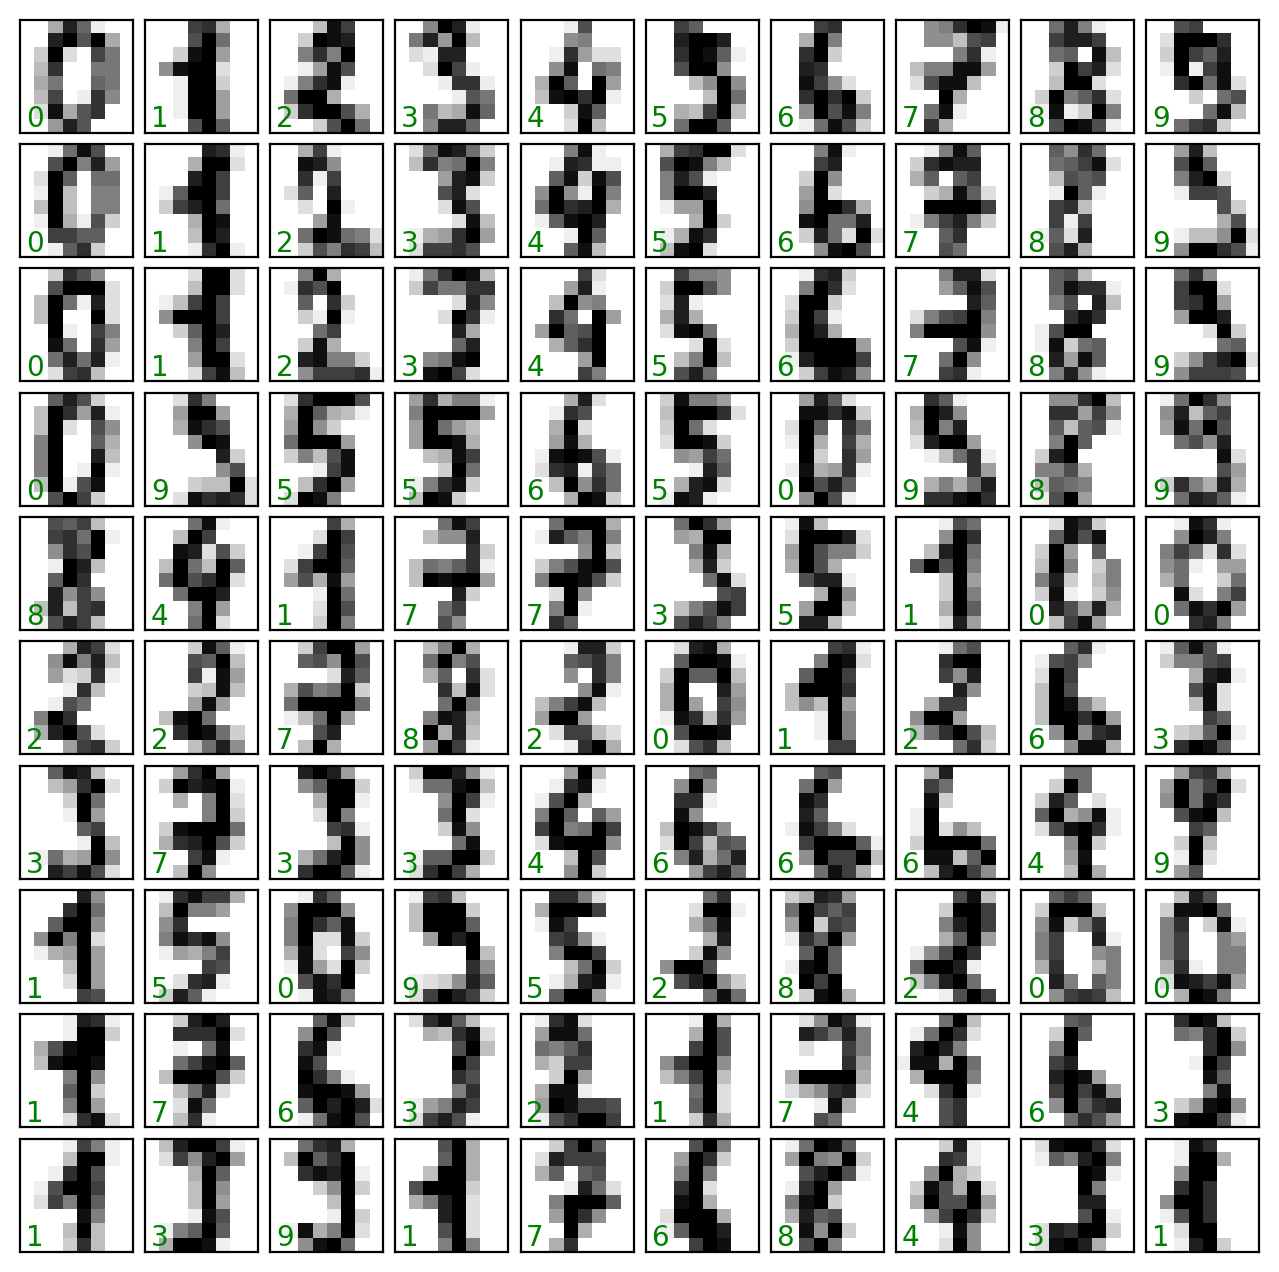

In [ ]:
#| fig-align: center
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [127]:
X = digits.data
y = digits.target

### Unsupervised Learning Example: Dimensionality Reduction
 We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead, we’ll reduce the number of dimensions, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called Isomap and transform the data to two dimensions: 

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

We see that the projected data is now two-dimensional. Let’s plot this data to see if we can learn anything from its structure

In [129]:
import plotly.express as px

px.scatter(x=data_projected[:,0], y=data_projected[:,1], color=y, labels={
    "color":"digit label" 
})

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros and ones have very little over‐ lap in the parameter space. Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle. On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with “hats” on them, which causes them to look similar to fours.

Overall, however, despite some mixing at the edges, the different groups appear to be fairly well localized in the parameter space: this suggests that even a very straightfor‐ ward supervised classification algorithm should perform suitably on the full high- dimensional dataset. Let’s give it a try.

### Classification on Digits
Let’s apply a classification algorithm to the digits data. As we did with the Iris data previously, we will split the data into training and testing sets and fit a Gaussian naive Bayes model:

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have the model’s predictions, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this very simple model, we find about 83% accuracy for classification of the digits! However, this single number doesn’t tell us where we’ve gone wrong. One nice way to do this is to use the confusion matrix

In [132]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

px.imshow(
    mat,
    text_auto=True,
    color_continuous_scale="Blues",
    labels=dict(x="predicted value", y="true value", color="Count"),
)

This shows us where the mislabeled points tend to be: for example, many of the twos here are misclassified as either ones or eights.

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We’ll use green for correct labels and red for incorrect labels

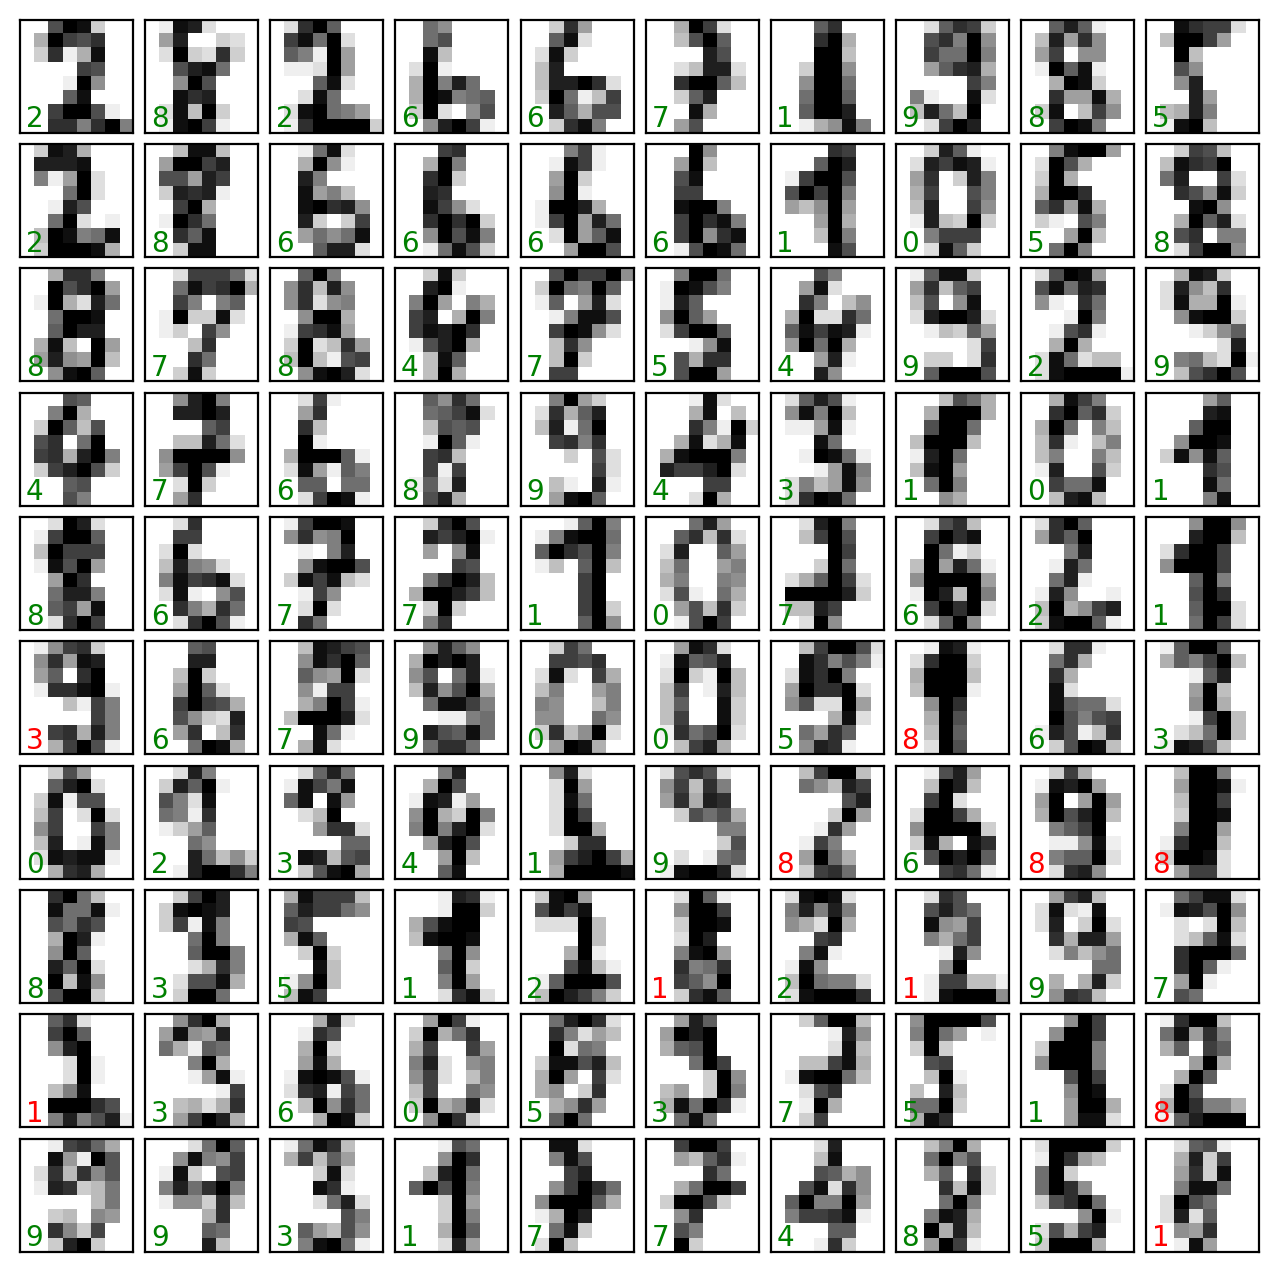

In [ ]:
#| fig-align: center
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data can give us some insight into where the algorithm might be not performing optimally. To go beyond our 83% classification success rate, we might switch to a more sophisticated algorithm such as support vector machines, random forests, or another classification approach.